In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Load data

In [3]:
import json

X_1 = None
y_1 = None
start = True
fixed_size = 250
max_length = 0

with open("../data/domain1_train.json") as f:
    for line in f:
        data = json.loads(line)
        if start:
            elements_to_add = fixed_size - len(data["text"])
            X_1 = np.array([np.pad(data["text"], (0, elements_to_add), 'constant')])
            y_1 = np.array(data["label"])
            start = False
        else:
            # X = np.append(X, [data["text"]], axis=0)
            elements_to_add = fixed_size - len(data["text"])
            X_1 = np.append(X_1, [np.pad(data["text"], (0, elements_to_add), 'constant')], axis=0)
            y_1 = np.append(y_1, data["label"])
        if max_length < len(data["text"]):
            max_length = len(data["text"])

In [4]:
X_1

array([[  70,  746,  825, ...,    0,    0,    0],
       [1209,  179, 1952, ...,    0,    0,    0],
       [ 287,    3, 3330, ...,    0,    0,    0],
       ...,
       [1820,   93,    3, ...,    0,    0,    0],
       [   5,   48,    6, ...,    0,    0,    0],
       [ 126,    1,  199, ...,    0,    0,    0]])

In [5]:
y_1

array([1, 1, 1, ..., 0, 0, 0])

## Model


In [6]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2)
model = LinearRegression()
model.fit(X_1_train, y_1_train)


LinearRegression()

In [7]:
r_sq = model.score(X_1_train, y_1_train)
r_sq

0.19841008778351787

In [8]:
y_1_pred = model.predict(X_1_test)
for i in range(len(y_1_pred)):
    if y_1_pred[i] >= 0.5:
        y_1_pred[i] = 1
    else:
        y_1_pred[i] = 0
accuracy = accuracy_score(y_1_test, y_1_pred)
accuracy

0.6846153846153846

0.1 0.5741025641025641
0.2 0.6058974358974359
0.3 0.6366666666666667
0.4 0.6533333333333333
0.5 0.6846153846153846
0.6 0.6335897435897436
0.7 0.5564102564102564
0.8 0.5148717948717949
0.9 0.5048717948717949


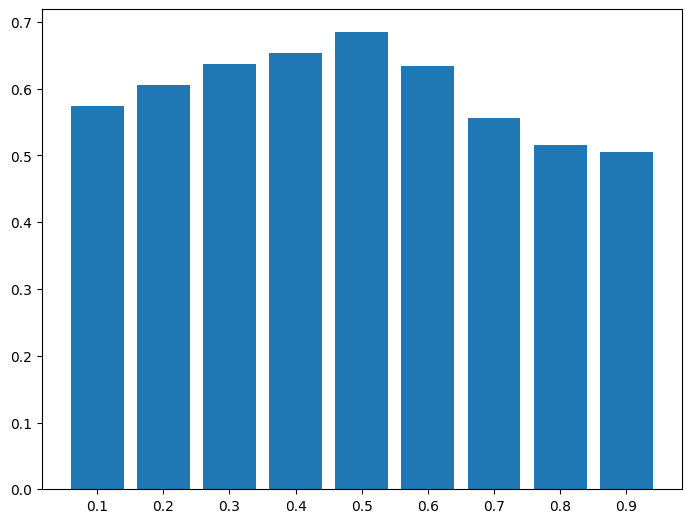

In [10]:
import matplotlib.pyplot as plt
weight_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy_list = []
for item in weight_list:
    y_1_pred = model.predict(X_1_test)
    for i in range(len(y_1_pred)):
        if y_1_pred[i] >= item:
            y_1_pred[i] = 1
        else:
            y_1_pred[i] = 0
    accuracy = accuracy_score(y_1_test, y_1_pred)
    accuracy_list += [accuracy]
    print(item, accuracy)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'],accuracy_list)
plt.show()